In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

In [6]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [15]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [16]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
data = pd.read_csv('D:/loan_prediction/train.csv')

In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [21]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [24]:
y = data.Survived

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
X = pd.get_dummies(X)

In [129]:
X = X.fillna({'Age': X.Age.median()})

In [29]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
clf.score(X_train, y_train)

0.8406040268456376

In [53]:
clf.score(X_test, y_test)

0.8101694915254237

In [113]:
max_depth_values = range(1, 100)

In [136]:
scores_data = pd.DataFrame()

In [137]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_data_score = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                    'cross_score' : [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_data_score)

In [138]:
scores_data.head(5)

,max_depth,train_score,test_score,cross_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.800303


In [139]:
pivot_table = pd.melt(scores_data, 
                      id_vars = 'max_depth', 
                      value_vars =['train_score', 'test_score', 'cross_score'],
                      var_name = 'set_type', value_name = 'Value')

In [140]:
pivot_table.head()

,max_depth,set_type,Value
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


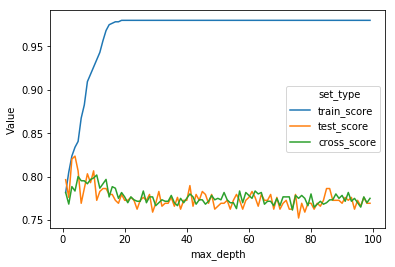

In [141]:
sns.lineplot(x="max_depth", y = "Value", hue = "set_type", data = pivot_table)

In [123]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [128]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [142]:
pivot_table.query("set_type == 'cross_score'").head(20)

,max_depth,set_type,Value
198,1,cross_score,0.781857
199,2,cross_score,0.768553
200,3,cross_score,0.788678
201,4,cross_score,0.783580
202,5,cross_score,0.800303
203,6,cross_score,0.795388
204,7,cross_score,0.795331
205,8,cross_score,0.791913
206,9,cross_score,0.796899
207,10,cross_score,0.798565


In [244]:
data = pd.read_csv("D:/loan_prediction/dogs_n_cats.csv")

In [245]:
data.head(3)
data.shape

(1000, 6)

In [248]:
X = data.drop(['Вид'], axis = 1)
y = data.Вид

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [250]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [251]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    
    temp_data_score = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                    'cross_score' : [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_data_score)

In [252]:
pivot_table = pd.melt(scores_data, 
                      id_vars = 'max_depth', 
                      value_vars =['train_score', 'test_score', 'cross_score'],
                      var_name = 'set_type', value_name = 'Value')

In [253]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)

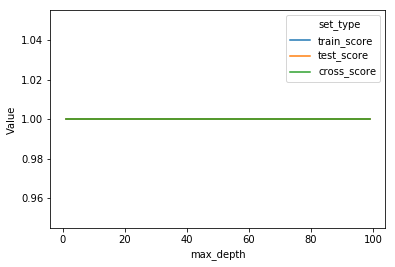

In [254]:
sns.lineplot(x="max_depth", y = "Value", hue = "set_type", data = pivot_table)

In [187]:
test =  pd.read_json('D:/loan_prediction/dataset_209691_15.txt')

In [181]:
test.head(2)


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,30,36.0,1,1,0


In [175]:
data.head(2)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка


In [261]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
clf.score(X_test, y_test)

1.0

In [262]:
hh = clf.predict(X_test)


In [263]:
precision_score(y_test, hh, average='micro') 

1.0

In [242]:
songs = pd.read_csv('D:/loan_prediction/songs.csv')

In [243]:
songs.dtypes

song            object
year             int64
artist          object
genre           object
lyrics          object
length           int64
commas           int64
exclamations     int64
colons           int64
hyphens          int64
dtype: object

In [235]:
songs.head(3)

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0


In [236]:
X = songs.drop(['song', 'lyrics'], axis = 1)
y = songs.song

In [237]:
y.head(3)

0              the-ownerz
1    dead-sound-of-misery
2           modred-s-song
Name: song, dtype: object

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [239]:
max_depth_values = range(1, 50)
scores_data = pd.DataFrame()

In [240]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    
    temp_data_score = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                    'cross_score' : [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_data_score)

ValueError: could not convert string to float: 'blind-guardian'